In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.7.0


In [3]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [4]:
tokenizer = info.features['text'].encoder

In [5]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        66048     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 635,329
Trainable params: 635,329
Non-trai

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 129s 318ms/step - loss: 0.5541 - accuracy: 0.7202 - val_loss: 0.4913 - val_accuracy: 0.7749
Epoch 2/10
391/391 [==============================] - 124s 316ms/step - loss: 0.5518 - accuracy: 0.7167 - val_loss: 0.6298 - val_accuracy: 0.7395
Epoch 3/10
391/391 [==============================] - 139s 355ms/step - loss: 0.4228 - accuracy: 0.8142 - val_loss: 0.5032 - val_accuracy: 0.7937
Epoch 4/10
391/391 [==============================] - 139s 355ms/step - loss: 0.2767 - accuracy: 0.8920 - val_loss: 0.3524 - val_accuracy: 0.8598
Epoch 5/10
391/391 [==============================] - 148s 378ms/step - loss: 0.2035 - accuracy: 0.9248 - val_loss: 0.3717 - val_accuracy: 0.8519
Epoch 6/10
391/391 [==============================] - 148s 378ms/step - loss: 0.1559 - accuracy: 0.9454 - val_loss: 0.3538 - val_accuracy: 0.8723
Epoch 7/10
391/391 [==============================] - 157s 402ms/step - loss: 0.1136 - accuracy: 0.9627 - val_loss: 0.3989 -

In [10]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

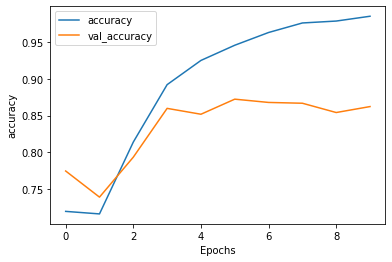

In [11]:
plot_graphs(history, 'accuracy')

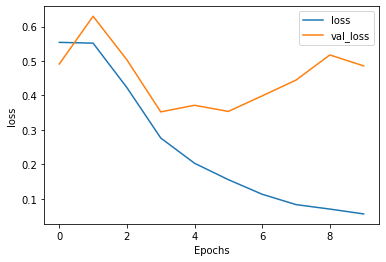

In [12]:
plot_graphs(history, 'loss')